In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
df = pd.read_csv('Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


### Processing Text - Remove Special Characters, #Sign, Punctuation and change it to lowercase.

In [5]:
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for word in r:
        input_text = re.sub(word,"",input_text)
    return input_text

In [6]:
#Remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [7]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [8]:
def l_case():
    for x in df['clean_tweet']:
        x.lowercase()

In [9]:
#Change text to lower case
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.lower()) 

In [10]:
#Remove punctuation
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))

In [11]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [12]:
#Remove Special characters, numbers and other non text
df['clean_tweet'] = df['clean_tweet'] .str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


### Remove Stop Words and perform Stemming & Lemmatization technique

In [13]:
#Tokenize words
from nltk import word_tokenize
tokenize_words = df['clean_tweet'].apply(lambda x: word_tokenize(x,"english"))

In [14]:
#Stemming the words
stemmer = PorterStemmer()
tokenize_words = tokenize_words.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

#lemmatization
lemmatizer = WordNetLemmatizer()
tokenize_words = tokenize_words.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])

In [15]:
#Combine tokenized words into single sentence
for i in range(len(tokenize_words)):
    tokenize_words[i] = " ".join(tokenize_words[i])

In [16]:
df['clean_tweet'] = tokenize_words

In [17]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for lyft credit i cant use caus they don...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguid societi now motiv


### Remove Stop Words and perform Stemming & Lemmatization technique

In [18]:

#List of Stop Words
stop_words = list(set(stopwords.words('english')))
#Remove Short Words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in word_tokenize(x,"english") if w not in stop_words]))
#df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [19]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfunc...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv


### Exploratory Data Analysis

In [20]:
#visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

In [21]:
type(all_words)

str

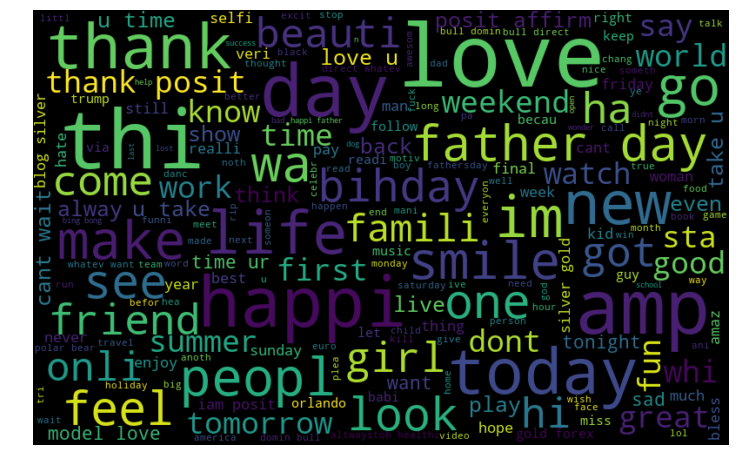

In [22]:
from wordcloud import WordCloud
all_words = " ".join([sentence for sentence in df['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

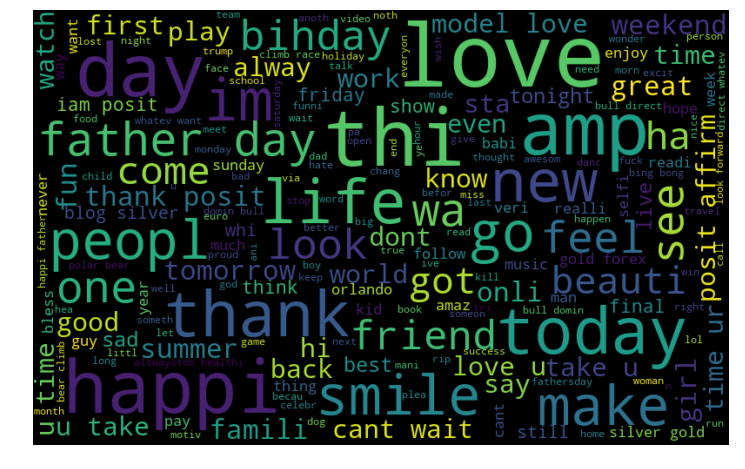

In [23]:
#visualize all positive words
all_words = " ".join([sentence for sentence in df['clean_tweet'] [df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### Sentiment Analysis & fetching other information

In [24]:
def hashtag_extract(tweets):
    hashtag = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)",tweet)
        hashtag.append(ht)
    return hashtag

In [25]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['tweet'][df['label']==1])

# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [26]:
ht_positive[:5]

['run', 'lyft', 'disapointed', 'getthanked', 'model']

In [27]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfunc...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguid societi motiv


### Get Subjectivity & Polarity of Tweets

In [28]:
from textblob import TextBlob
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['clean_tweet'].apply(getSubjectivity)
#df['Polarity'] = df['clean_tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'


In [29]:
df.head()

,id,label,tweet,clean_tweet,Subjectivity
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfunc...,0.535417
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...,0.000000
2,3,0,bihday your majesty,bihday majesti,0.000000
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,0.600000
4,5,0,factsguide: society now #motivation,factsguid societi motiv,0.000000


In [30]:
#List of Tokenized Words
#Tokenize words
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
tw = df['clean_tweet'].apply(lambda x: word_tokenize(x,"english"))
Posivite_wrds = []
Negative_wrds = []
Neutral_wrds =  []
sv = SentimentIntensityAnalyzer()
for line in tw:
    for word in line:
        score = sv.polarity_scores(word)
        neg = score['neg']
        pos = score['pos']
        if pos>neg:
            Posivite_wrds.append(word)
        elif neg > pos:
            Negative_wrds.append(word)
        else:
            Neutral_wrds.append(word)

### Getting list of Positive, Negative & Neutral Words

In [31]:
print(Posivite_wrds[:5])
print(Negative_wrds[:5])
print(Neutral_wrds[:5])

['thank', 'credit', 'love', 'huge', 'fan']
['selfish', 'drag', 'pay', 'hate', 'selfish']
['father', 'dysfunct', 'hi', 'kid', 'hi']


In [44]:
from collections import Counter
Emotions_Count = Counter(Posivite_wrds)
print(Emotions_Count)

Counter({'love': 3151, 'thank': 1543, 'like': 1224, 'smile': 898, 'good': 869, 'want': 773, 'friend': 730, 'fun': 595, 'ha': 592, 'great': 527, 'best': 518, 'cute': 431, 'well': 409, 'play': 377, 'bless': 350, 'hope': 339, 'enjoy': 316, 'wish': 291, 'help': 286, 'free': 281, 'god': 253, 'holiday': 213, 'lol': 209, 'nice': 202, 'cool': 196, 'better': 195, 'proud': 178, 'dream': 177, 'true': 176, 'success': 172, 'win': 172, 'fit': 170, 'fan': 162, 'relax': 159, 'yeah': 155, 'strong': 154, 'joy': 154, 'wow': 143, 'share': 141, 'care': 135, 'reach': 132, 'truth': 130, 'perfect': 124, 'kind': 122, 'laugh': 117, 'pray': 116, 'gift': 115, 'super': 111, 'join': 105, 'matter': 104, 'yay': 103, 'sure': 97, 'sweet': 96, 'tgif': 91, 'hand': 88, 'save': 87, 'special': 85, 'gt': 82, 'accept': 77, 'lover': 76, 'cheer': 75, 'safe': 75, 'treat': 74, 'ok': 73, 'top': 73, 'joke': 73, 'dear': 69, 'respect': 67, 'freedom': 66, 'friendship': 66, 'fresh': 62, 'clean': 57, 'allow': 57, 'glad': 54, 'award': 52

In [32]:
def sentiment_analyses(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    neg = score['neg']
    pos = score['pos']
    if neg>pos:
        return 'Negative Sentiment'
    elif pos > neg:
        return 'Positive Sentiment'
    else:
        return 'Neutral Sentiment'

In [33]:
df ['New Analysis'] = df['clean_tweet'].apply(sentiment_analyses)
df.head()

,id,label,tweet,clean_tweet,Subjectivity,New Analysis
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag hi kid hi dysfunc...,0.535417,Negative Sentiment
1,2,0,@user @user thanks for #lyft credit i can't us...,thank lyft credit cant use caus dont offer whe...,0.000000,Positive Sentiment
2,3,0,bihday your majesty,bihday majesti,0.000000,Neutral Sentiment
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,0.600000,Positive Sentiment
4,5,0,factsguide: society now #motivation,factsguid societi motiv,0.000000,Neutral Sentiment


### Visualization based on Sentiments, Subjectivity & hashtag counts.

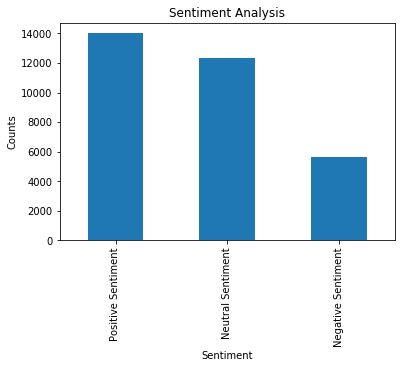

In [34]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['New Analysis'].value_counts().plot(kind = 'bar')
plt.show()

### Data Visualization based on hashtag counts 

In [37]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,33
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,364


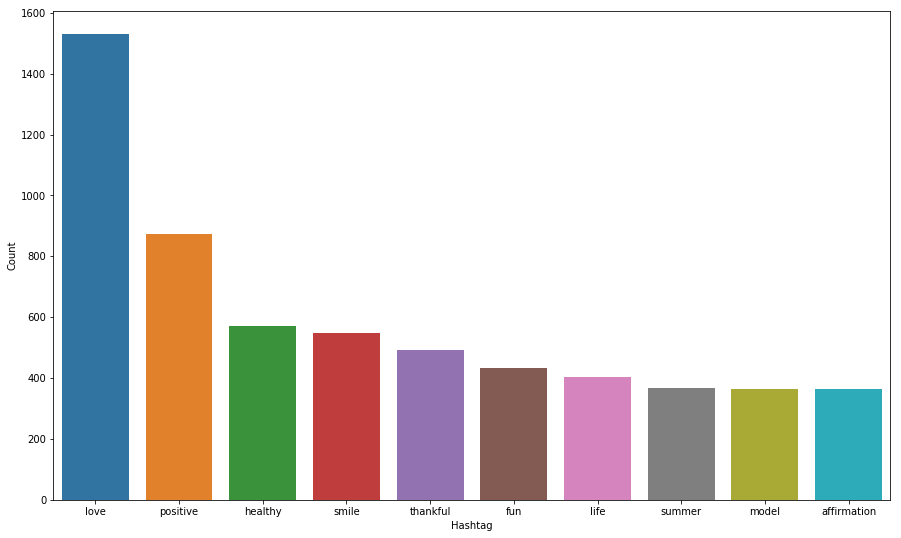

In [38]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [39]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


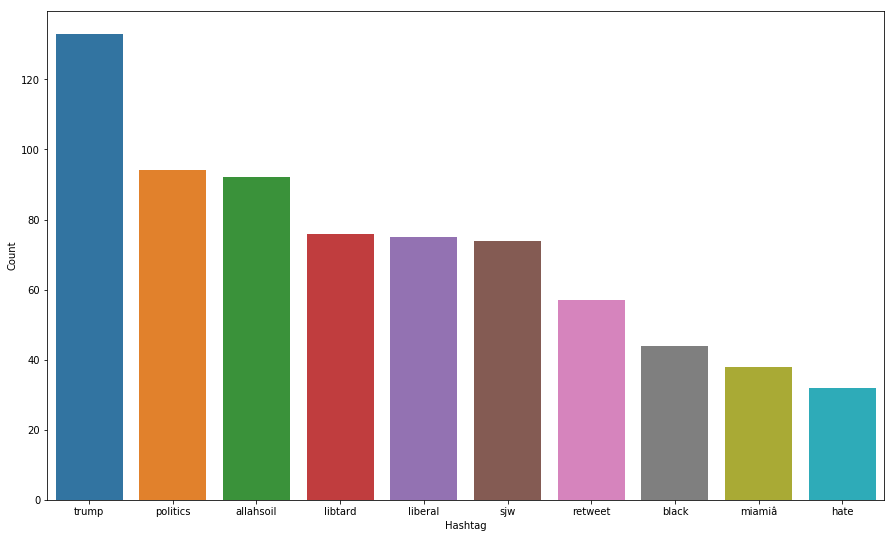

In [40]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

### Saving new excel 

In [41]:
df.to_excel('final.xlsx')

### Model Creation using Logistic Regression & Input Split

In [41]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
bow_vectorizer = CountVectorizer(max_df=0.90,min_df = 2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['finaltweet'])

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow,df['label'],random_state = 42,test_size = 0.25)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [46]:
lm = LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
pred = lm.predict(x_test)
f1_score(y_test,pred)

0.48803827751196177

In [48]:
accuracy_score(y_test,pred)

0.9464397447128019

In [49]:
df.to_excel('Test.xlsx')

In [53]:
df.head()

,id,label,tweet,clean_tweet,finaltweet,Subjectivity,Polarity,Analysis,New Analysis
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,when father dysfunct selfish drag kid into dys...,0.535417,-0.3,Negative,Negative Sentiment
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cant cause they dont offer ...,thank lyft credit cant caus they dont offer wh...,0.000000,0.0,Neutral,Positive Sentiment
2,3,0,bihday your majesty,bihday your majesty,bihday your majesti,0.000000,0.0,Neutral,Neutral Sentiment
3,4,0,#model i love u take with u all the time in ...,model love take with time,model love take with time,0.600000,0.5,Positive,Positive Sentiment
4,5,0,factsguide: society now #motivation,factsguide society motivation,factsguid societi motiv,0.000000,0.0,Neutral,Neutral Sentiment


In [54]:
df.to_excel('T.xlsx')

### New Model Creation

In [55]:
#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


In [56]:
TF_vectorizer = TfidfVectorizer(max_df=0.90,min_df = 2,max_features=1000,stop_words='english')
Tfidf = TF_vectorizer.fit_transform(df['finaltweet'])

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Tfidf,df['label'],random_state = 42,test_size = 0.25)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

pred = lm.predict(x_test)
f1_score(y_test,pred)

0.27439024390243905

In [58]:
accuracy_score(y_test,pred)

0.9404329871104993